In [12]:
import src.data_processing.data as data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import geopandas as gpd
from sklearn.linear_model import LinearRegression
import os

count              198
unique             113
top       brussel-zuid
freq                10
Name: Place, dtype: object
Place
-                           8
aarschot                    2
anderlecht-rooster oost     1
anderlecht-rooster west     1
ans                         1
                           ..
y.ruisbroek                 2
y.sint-katherina-lombeek    1
y.west berchem              1
zellik                      1
zwijndrecht                 1
Length: 113, dtype: int64
Description of the incident
Aanrijding van een dier                   1
Aanwezigheid verdacht pakket              2
Bommelding                                1
Brand in de nabijheid van het spoor       4
Brand in het spoor                        3
Dringende werken                          9
IT storing                                1
Incident tijdens een werf                16
Kabeldiefstal                             4
Kwaadwillige daad                         6
Laattijdig einde van werken               3
Lichaam

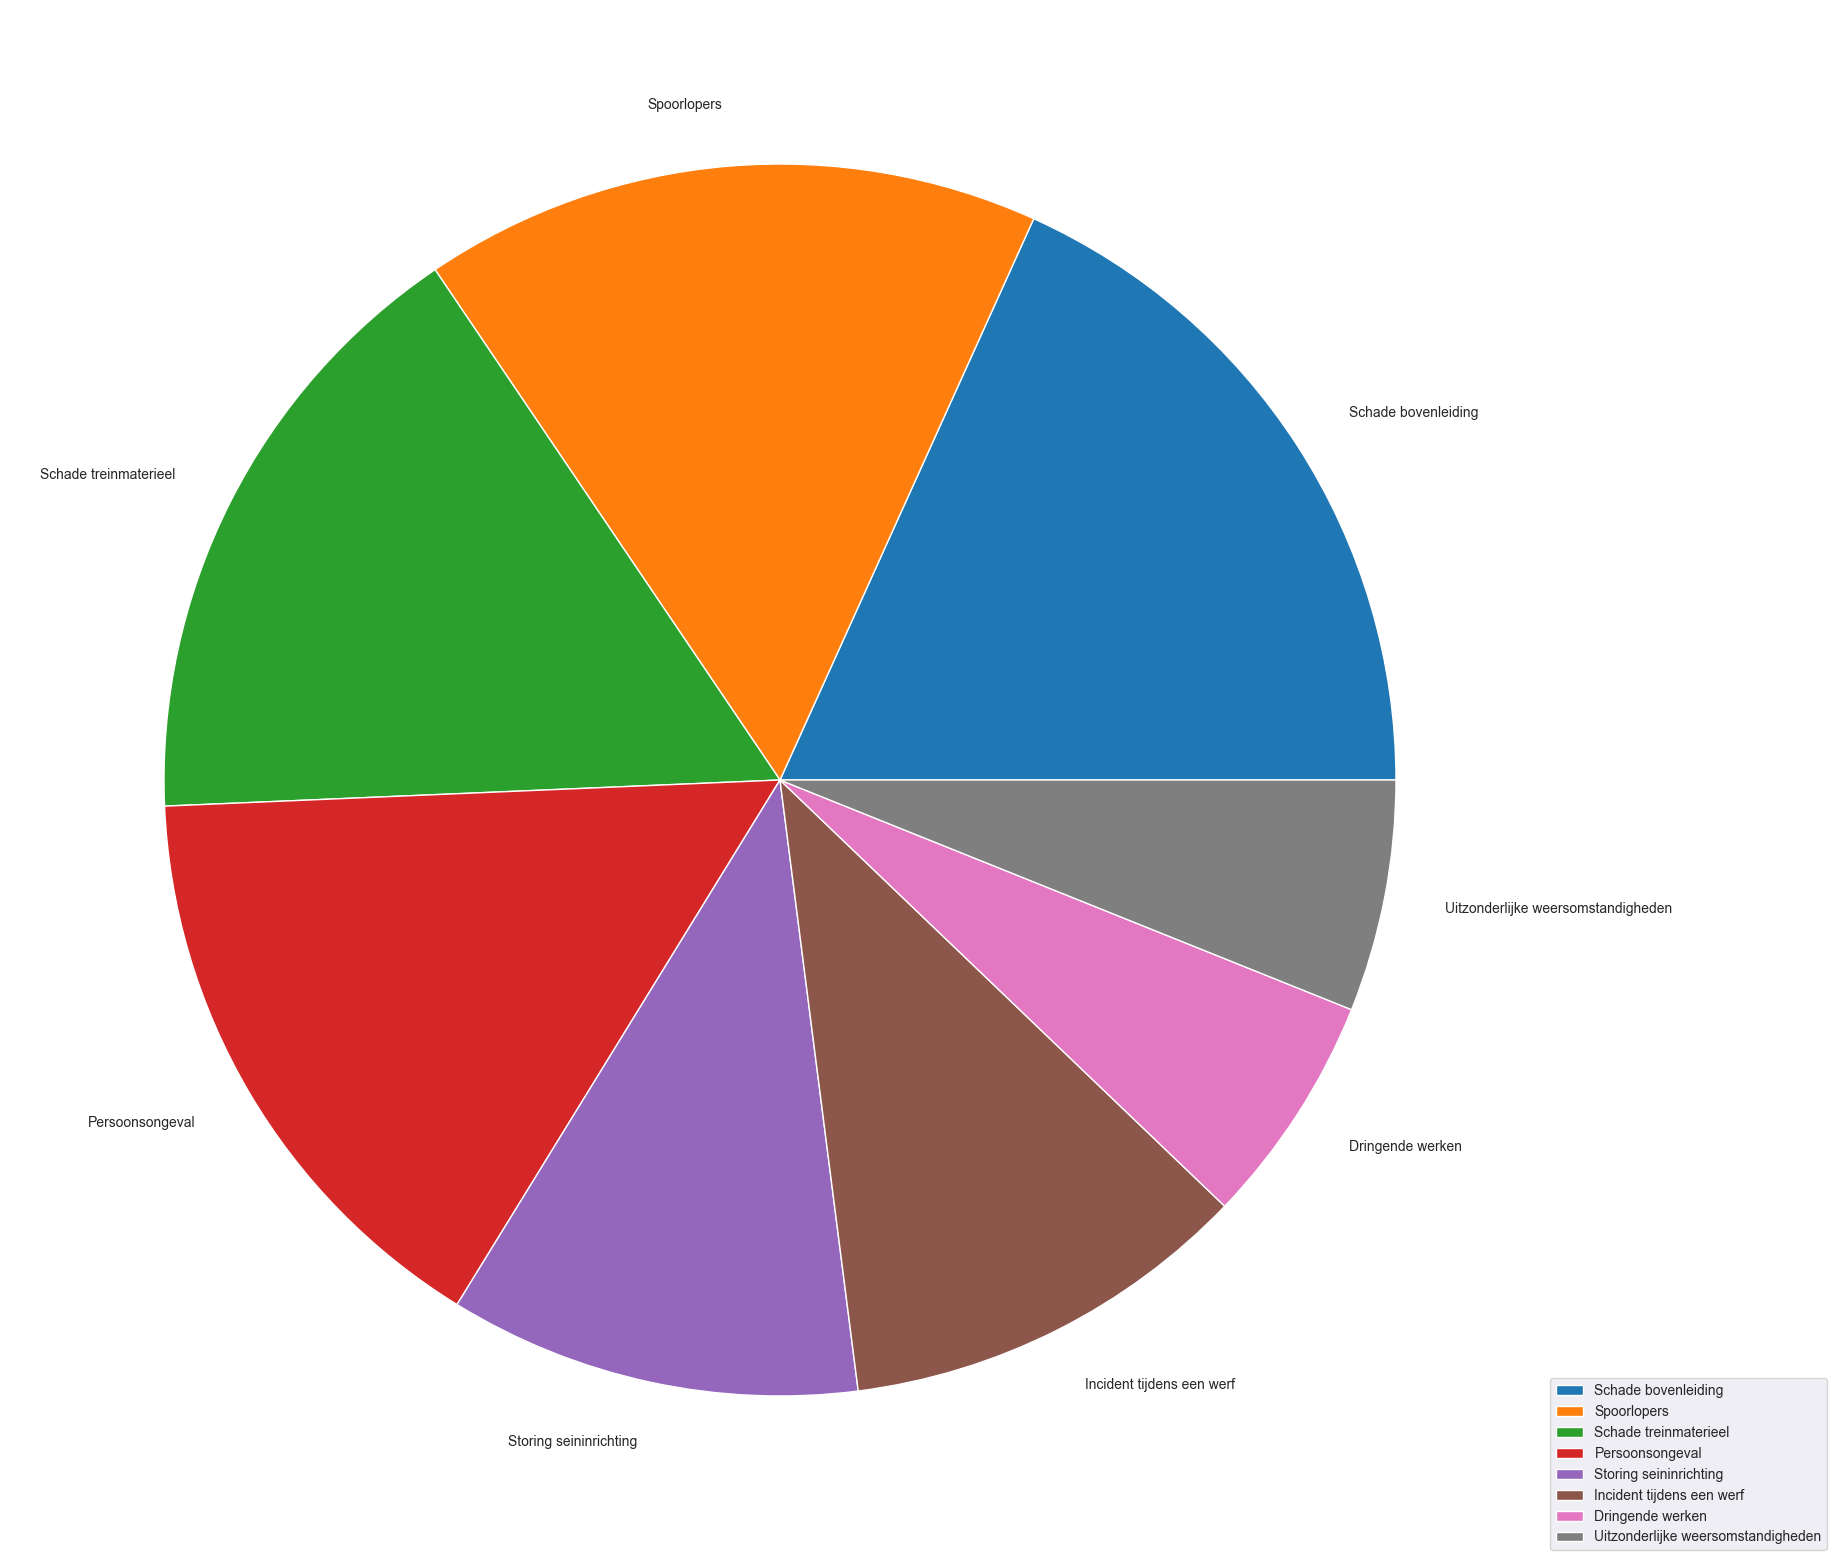

In [13]:
print(data.incidents["Place"].describe())
print(data.incidents.groupby('Place').size())
incidents_location = pd.Series(data.incidents.groupby('Place').size())
#incidents_location.plot.pie()
print(data.incidents.groupby('Description of the incident').size())
incidents_type = pd.Series(data.incidents.groupby('Description of the incident').size())
incidents_type = incidents_type.sort_values(ascending=False).head(8)
plt.figure(figsize=(20,20))
print(incidents_type)

incidents_type.plot.pie()
num1 = 1
num2 = 0
num3 = 3
num4 = 0
plt.legend(bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4)
plt.show()

count              198
unique             113
top       brussel-zuid
freq                10
Name: Place, dtype: object
Place
-                           8
aarschot                    2
anderlecht-rooster oost     1
anderlecht-rooster west     1
ans                         1
                           ..
y.ruisbroek                 2
y.sint-katherina-lombeek    1
y.west berchem              1
zellik                      1
zwijndrecht                 1
Length: 113, dtype: int64
Description of the incident
Aanrijding van een dier                   1
Aanwezigheid verdacht pakket              2
Bommelding                                1
Brand in de nabijheid van het spoor       4
Brand in het spoor                        3
Dringende werken                          9
IT storing                                1
Incident tijdens een werf                16
Kabeldiefstal                             4
Kwaadwillige daad                         6
Laattijdig einde van werken               3
Lichaam

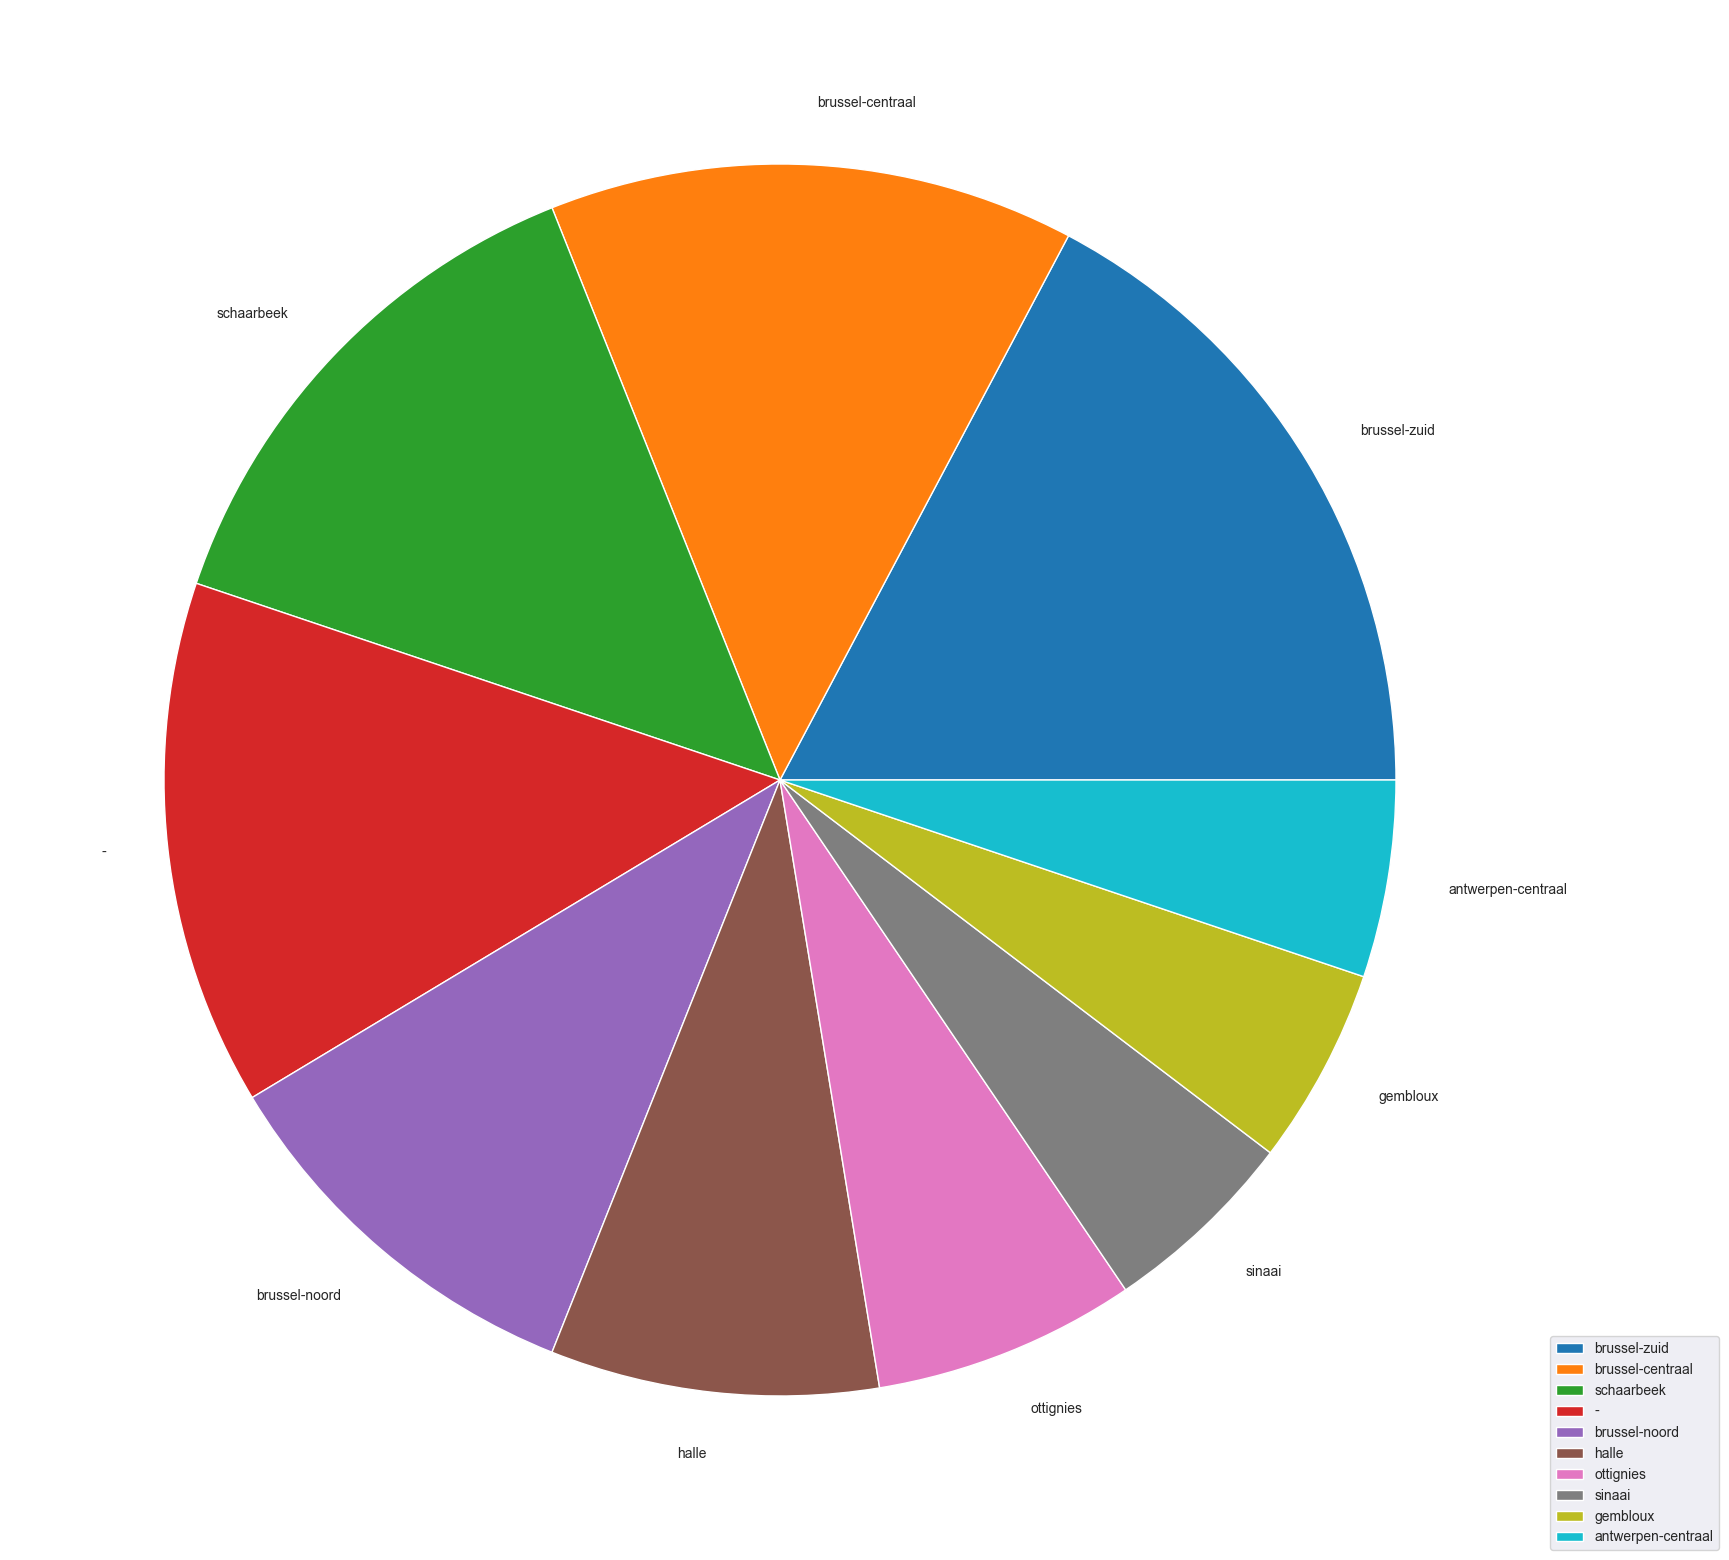

In [14]:
print(data.incidents["Place"].describe())
print(data.incidents.groupby('Place').size())
plt.figure(figsize=(20,20))
incidents_location = pd.Series(data.incidents.groupby('Place').size())
incidents_location = incidents_location.sort_values(ascending=False).head(10)
incidents_location.plot.pie()
print(data.incidents.groupby('Description of the incident').size())
incidents_type = pd.Series(data.incidents.groupby('Description of the incident').size())

#incidents_type.plot.pie()
num1 = 1
num2 = 0
num3 = 3
num4 = 0
plt.legend(bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4)
plt.show()

Place
obaix-buzet            2
diest                  2
buizingen              2
sinaai                 3
mechelen               3
y.noord halle          3
groenendaal            3
antwerpen-centraal     3
gembloux               3
beervelde              3
vilvoorde              3
brussel-congres        3
leuven                 3
ottignies              4
halle                  5
brussel-noord          6
brussel-centraal       8
schaarbeek             8
-                      8
brussel-zuid          10
dtype: int64


<AxesSubplot: title={'center': 'High frequency incidents locations'}>

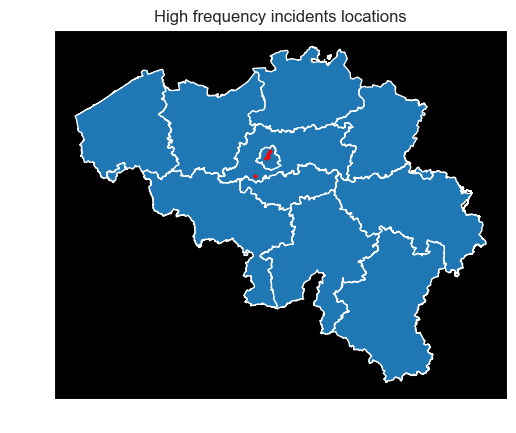

In [15]:
# map_df = gpd.read_file('../../Data/BELGIUM_-_Municipalities.shp')
# map_df.head()
incidents_location = pd.Series(data.incidents.groupby('Place').size())
print(incidents_location.sort_values().tail(20))
data1 = {'Name':  ['BRUSSEL-ZUID', 'SCHAARBEEK', 'BRUSSEL-CENTRAAL','BRUSSEL-NOORD', 'HALLE'],
        'lat': [50.835707, 50.878513, 50.845658, 50.859663, 50.733931],
        'lon': [4.336531, 4.378636, 4.356801,4.360846,4.240634]}
data_df = pd.DataFrame(data1, columns = ['Name', 'lat', 'lon'])
#data_df.plot('lon', 'lat', 'scatter',  color='red')
ax = data_df.plot('lon', 'lat', 'scatter',  color='red', zorder=2, s=4,)
ax.set_title("High frequency incidents locations")
# ax.axis("off")
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(color='w')
plt.yticks(color='w')
plt.grid(color='black')
ax.patch.set_facecolor("black")
data.provinces.plot(ax = ax)
# map_df.plot(cmap='Blues', linewidth=0.8, ax = ax, zorder = 1, figsize = (20,20))
#map_df.plot()


In [16]:
data.full_trips.describe()
data.full_trips["Delay time"]
#define dalay more than one hour as extreme delay
trips = data.full_trips
trips["Delay time"]

0         22
1         23
2         44
3         39
4          0
        ... 
72524    923
72525    614
72526    802
72527    121
72528    237
Name: Delay time, Length: 440943, dtype: int16

In [17]:
#delete all the trips that are delayed more than 24 hours
trips = data.full_trips
for x in trips[['Delay time']]:
    trips.loc[trips[x] > 85000,x] = np.nan
trips[["Delay time"]].describe()

,Delay time
count,440943.000000
mean,122.892338
std,350.910273
min,0.000000
25%,0.000000
50%,31.000000
75%,123.000000
max,24536.000000


In [18]:
#define the delay time longer than 1 hour as extreme delay
trips['Delay time'] = pd.to_numeric(trips['Delay time'], errors='raise', downcast='integer')
trips2 = trips[trips['Delay time'] >= 3600]
trips2['Name of the stop'] = trips2['Name of the stop'].str.upper()
trips2

/var/folders/v2/875x9vcs3ylbf36njx44yk5r0000gn/T/ipykernel_97411/1154905037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips2['Name of the stop'] = trips2['Name of the stop'].str.upper()


,Unnamed: 0,Date of departure,Train number,Relation,Railway operators,Railway of departure,Time of real arrival,Time of real departure,Time of planned arrival,Time of planned departure,Direction of relation,Name of the stop,Railway of arrival,Date of planned arrival,Date of planned departure,Date of real arrival,Date of real departure,Delay time
9689,9689,2020-09-22,1785,L B1-1,SNCB/NMBS,NaN,2020-09-22 21:19:56,NaT,2020-09-22 14:31:00,NaT,L B1-1: ANTWERPEN-CENTRAAL -> NIVELLES,VILVOORDE,27,2020-09-22,NaT,2020-09-22,NaT,24536
32640,32640,2020-09-22,941,IC 19-1,SNCB/NMBS,112,2020-09-22 21:32:31,2020-09-22 21:32:31,2020-09-22 20:25:00,2020-09-22 20:25:00,IC 19-1: NAMUR -> TOURNAI,MORLANWELZ,112,2020-09-22,2020-09-22,2020-09-22,2020-09-22,4051
32643,32643,2020-09-22,941,IC 19-1,SNCB/NMBS,118,2020-09-22 21:42:54,2020-09-22 21:42:54,2020-09-22 20:34:00,2020-09-22 20:34:00,IC 19-1: NAMUR -> TOURNAI,BRACQUEGNIES,118,2020-09-22,2020-09-22,2020-09-22,2020-09-22,4134
32646,32646,2020-09-22,941,IC 19-1,SNCB/NMBS,118,2020-09-22 21:43:56,2020-09-22 21:43:56,2020-09-22 20:35:00,2020-09-22 20:35:00,IC 19-1: NAMUR -> TOURNAI,THIEU,118,2020-09-22,2020-09-22,2020-09-22,2020-09-22,4136
32649,32649,2020-09-22,941,IC 19-1,SNCB/NMBS,118,2020-09-22 21:44:56,2020-09-22 21:44:56,2020-09-22 20:36:00,2020-09-22 20:36:00,IC 19-1: NAMUR -> TOURNAI,HAVRE,118,2020-09-22,2020-09-22,2020-09-22,2020-09-22,4136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72378,72378,2020-09-25,9472,THAL,THI-FACT,0/2,2020-09-25 19:52:55,2020-09-25 19:52:55,2020-09-25 18:28:00,2020-09-25 18:28:00,THAL:KOLN HBF -> PARIS-NORD,BRUSSEL-NOORD/BRUXELLES-NORD,36N,2020-09-25,2020-09-25,2020-09-25,2020-09-25,5095
72379,72379,2020-09-25,9472,THAL,THI-FACT,0/2,2020-09-25 19:54:32,2020-09-25 19:54:32,2020-09-25 18:30:00,2020-09-25 18:30:00,THAL:KOLN HBF -> PARIS-NORD,BRUSSEL-CONGRES/BRUXELLES-CONGRÈS,0/2,2020-09-25,2020-09-25,2020-09-25,2020-09-25,5072
72380,72380,2020-09-25,9472,THAL,THI-FACT,96N,2020-09-25 19:59:29,2020-09-25 20:04:16,2020-09-25 18:35:00,2020-09-25 18:43:00,THAL:KOLN HBF -> PARIS-NORD,BRUSSEL-ZUID/BRUXELLES-MIDI,0/2,2020-09-25,2020-09-25,2020-09-25,2020-09-25,5069
72443,72443,2020-09-25,9461,THAL,THI-FACT,3,2020-09-25 19:37:29,2020-09-25 19:37:29,2020-09-25 18:16:00,2020-09-25 18:16:00,THAL:PARIS-NORD -> KOLN HBF,CHÊNÉE,37,2020-09-25,2020-09-25,2020-09-25,2020-09-25,4889


In [19]:
#extreme delay of more than 5 times is high frequency
extreme_delay_location = pd.Series(trips2.groupby('Name of the stop').size())
extreme_delay_location2 = extreme_delay_location.sort_values(ascending=False)
extreme_delay_high_frequency = pd.DataFrame(extreme_delay_location2.head(22))
extreme_delay_high_frequency

,0
Name of the stop,
BRUSSEL-ZUID/BRUXELLES-MIDI,11
BRUSSEL-NOORD/BRUXELLES-NORD,10
LIÈGE-GUILLEMINS,9
BRUSSEL-CONGRES/BRUXELLES-CONGRÈS,8
HALLE,8
BRUSSEL-KAPELLEKERK/BRUXELLES-CHAPELLE,8
SCHAARBEEK/SCHAERBEEK,8
ANS,8
BRUSSEL-CENTRAAL/BRUXELLES-CENTRAL,8


In [20]:
stations_upper = data.stations
stations_upper['name'] = stations_upper['name'].str.upper()
stations_upper
location_extreme_delay = pd.merge(extreme_delay_high_frequency,stations_upper,how ='inner',left_on = 'Name of the stop',right_on = 'name')
location_extreme_delay

,0,URI,name,country-code,longitude,latitude,avg_stop_times,official_transfer_time
0,11,008814001,BRUSSEL-ZUID/BRUXELLES-MIDI,be,4.336531,50.835707,1040.664179,300.0
1,10,008812005,BRUSSEL-NOORD/BRUXELLES-NORD,be,4.360846,50.859663,977.910448,300.0
2,9,008841004,LIÈGE-GUILLEMINS,be,5.566695,50.624550,451.537313,300.0
3,8,008813045,BRUSSEL-CONGRES/BRUXELLES-CONGRÈS,be,4.362051,50.852067,970.149254,300.0
4,8,008814308,HALLE,be,4.240634,50.733931,357.656716,300.0
5,8,008813037,BRUSSEL-KAPELLEKERK/BRUXELLES-CHAPELLE,be,4.347866,50.841127,970.149254,300.0
6,8,008811007,SCHAARBEEK/SCHAERBEEK,be,4.378636,50.878513,737.231343,300.0
7,8,008841202,ANS,be,5.509704,50.661208,115.261194,300.0
8,8,008813003,BRUSSEL-CENTRAAL/BRUXELLES-CENTRAL,be,4.356801,50.845658,970.149254,300.0
9,6,008842036,CHÊNÉE,be,5.616073,50.608019,86.328358,300.0


<AxesSubplot: title={'center': 'High frequency of extreme delay locations'}>

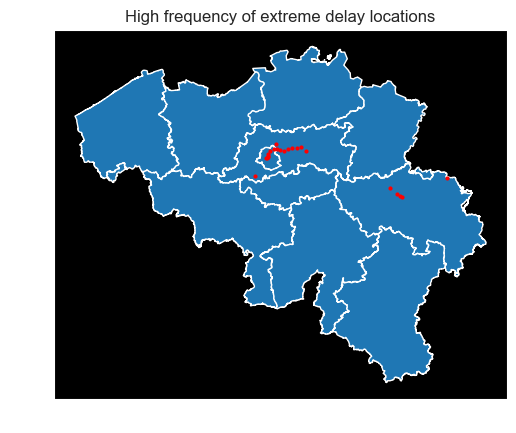

In [21]:
# map_df2 = gpd.read_file('../Data/Unprocessed/BELGIUM_-_Provinces/BELGIUM_-_Provinces.shp')
# map_df2.head()
data1 = {'Name':  location_extreme_delay['name'],
        'lat': location_extreme_delay['latitude'],
        'lon': location_extreme_delay['longitude']}
data_df = pd.DataFrame(data1, columns = ['Name', 'lat', 'lon'])
#data_df.plot('lon', 'lat', 'scatter',  color='red')
ax = data_df.plot('lon', 'lat', 'scatter',  color='red', zorder=2, s=4)
ax.set_title("High frequency of extreme delay locations")
ax.patch.set_facecolor("black")
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(color='w')
plt.yticks(color='w')
plt.grid(color='black')
data.provinces.plot(ax = ax)
# map_df2.plot(cmap='Blues', linewidth=0.8, ax = ax, zorder = 1, figsize = (20,20))
#map_df.plot()
#extreme delay happens very often in the region of brussels and liege

In [22]:
hash('srting')
hash((23,234))

746533295309162703